Convective core detection using 2C-precip column flag and 10dBz echo top height threshold

In [46]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from cloudsatipy import open_cloudsat

In [2]:
data_path = pathlib.Path("../data")
data_files = sorted(list(data_path.glob("*.hdf")))

In [11]:
geoprof_file = next(data_path.glob("2010195112321_22399_CS_2B-GEOPROF_GRANULE_P1_R05_E03_F00.hdf"))

In [12]:
geoprof_file

PosixPath('../data/2010195112321_22399_CS_2B-GEOPROF_GRANULE_P1_R05_E03_F00.hdf')

In [13]:
open_cloudsat(geoprof_file)

<xarray.Dataset> Size: 78MB
Dimensions:                    (Nray: 37081, Nbin: 125)
Coordinates:
    Profile_time               (Nray) datetime64[ns] 297kB 2010-07-14T11:23:2...
    UTC_start                  float64 8B 4.1e+04
    TAI_start                  float64 8B 5.533e+08
    Latitude                   (Nray) float32 148kB -0.001594 ... 0.009657
    Longitude                  (Nray) float32 148kB -144.6 -144.6 ... -169.3
    Height                     (Nray, Nbin) float32 19MB 2.503e+04 ... -4.804...
    Range_to_intercept         (Nray) float32 148kB 705.5 705.5 ... 705.4 705.4
    DEM_elevation              (Nray) float32 148kB nan nan nan ... nan nan nan
    Vertical_binsize           float64 8B 239.8
    Pitch_offset               float64 8B 0.16
    Roll_offset                float64 8B 0.0
Dimensions without coordinates: Nray, Nbin
Data variables: (12/21)
    Data_quality               (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Data_status                (Nray) float32 148kB 4.148e+03 ... 4.148e+03
    Data_targetID              (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RayStatus_validity         (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SurfaceHeightBin           (Nray) float32 148kB 105.0 105.0 ... 105.0 105.0
    SurfaceHeightBin_fraction  (Nray) float32 148kB 0.357 0.363 ... -0.032
    ...                         ...
    sem_NoiseFloor             (Nray) float32 148kB 4.232e-15 4.162e-15 ... nan
    sem_NoiseFloorVar          (Nray) float32 148kB 2.912e-32 ... 9.999e+03
    sem_NoiseGate              (Nray) float32 148kB 14.0 14.0 17.0 ... nan nan
    Navigation_land_sea_flag   (Nray) float32 148kB 2.0 2.0 2.0 ... 2.0 2.0 2.0
    Clutter_reduction_flag     (Nray) float32 148kB 1.0 1.0 1.0 ... 1.0 1.0 1.0
    sem_MDSignal               (Nray) float32 148kB -29.41 -29.41 ... -29.41
Attributes:
    granule_number:     22399.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Wed Jan 24 19:47:36 2018
    algorithm_name:     2B-GEOPROF
    algorithm_version:  P1_R05.
    product_version:    P1_R0
    start_time:         20100714112321
    end_time:           20100714130213

In [7]:
precip_column_file = next(data_path.glob("2010195112321_22399_CS_2C-PRECIP-COLUMN_GRANULE_P1_R05_E03_F00.hdf"))

In [8]:
precip_column_file

PosixPath('../data/2010195112321_22399_CS_2C-PRECIP-COLUMN_GRANULE_P1_R05_E03_F00.hdf')

In [10]:
open_cloudsat(precip_column_file)

<xarray.Dataset> Size: 6MB
Dimensions:                            (Nray: 37081, Y: 1, X: 1)
Coordinates:
    Profile_time                       (Nray) datetime64[ns] 297kB 2010-07-14...
    UTC_start                          float64 8B 4.1e+04
    TAI_start                          float64 8B 5.533e+08
    Latitude                           (Nray) float32 148kB -0.001594 ... 0.0...
    Longitude                          (Nray) float32 148kB -144.6 ... -169.3
    DEM_elevation                      (Nray) float32 148kB nan nan ... nan nan
Dimensions without coordinates: Nray, Y, X
Data variables: (12/36)
    Data_quality                       (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    Data_status                        (Nray) float32 148kB 4.148e+03 ... 4.1...
    Data_targetID                      (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    RayStatus_validity                 (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    Navigation_land_sea_flag           (Nray) float32 148kB 2.0 2.0 ... 2.0 2.0
    Precip_flag                        (Nray) float32 148kB 0.0 0.0 ... 0.0 0.0
    ...                                 ...
    Diagnostic_PIA_method              (Nray) float32 148kB 1.0 1.0 ... 1.0 1.0
    Diagnostic_PIA_hydrometeor_ws      (Nray) float32 148kB -0.3932 ... 0.07251
    Diagnostic_PIA_uncertainty_ws      (Nray) float32 148kB 1.117 ... 1.104
    Experimental_land_PIA              (Nray) float32 148kB nan nan ... nan nan
    Experimental_land_PIA_uncertainty  (Nray) float32 148kB nan nan ... nan nan
    unused                             (Y, X) float32 4B 0.0
Attributes:
    granule_number:     22399.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS2
    ID_CREATED:         Mon Jan 29 20:29:11 2018
    algorithm_name:     2C-PRECIP-COLUMN
    algorithm_version:  P1_R05.0
    product_version:    P1_R05
    start_time:         20100714112321
    end_time:           20100714130213

In [14]:
geoprof_ds = open_cloudsat(geoprof_file, variable=["Data_quality", "CPR_Cloud_mask", "Radar_Reflectivity"])

In [15]:
geoprof_ds

<xarray.Dataset> Size: 57MB
Dimensions:             (Nray: 37081, Nbin: 125)
Coordinates:
    Profile_time        (Nray) datetime64[ns] 297kB 2010-07-14T11:23:21.15234...
    UTC_start           float64 8B 4.1e+04
    TAI_start           float64 8B 5.533e+08
    Latitude            (Nray) float32 148kB -0.001594 -0.01126 ... 0.009657
    Longitude           (Nray) float32 148kB -144.6 -144.6 ... -169.3 -169.3
    Height              (Nray, Nbin) float32 19MB 2.503e+04 ... -4.804e+03
    Range_to_intercept  (Nray) float32 148kB 705.5 705.5 705.5 ... 705.4 705.4
    DEM_elevation       (Nray) float32 148kB nan nan nan nan ... nan nan nan nan
    Vertical_binsize    float64 8B 239.8
    Pitch_offset        float64 8B 0.16
    Roll_offset         float64 8B 0.0
Dimensions without coordinates: Nray, Nbin
Data variables:
    Data_quality        (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    CPR_Cloud_mask      (Nray, Nbin) float32 19MB nan nan nan ... nan nan nan
    Radar_Reflectivity  (Nray, Nbin) float32 19MB nan nan -30.41 ... 168.3 168.3
Attributes:
    granule_number:     22399.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS3
    ID_CREATED:         Wed Jan 24 19:47:36 2018
    algorithm_name:     2B-GEOPROF
    algorithm_version:  P1_R05.
    product_version:    P1_R0
    start_time:         20100714112321
    end_time:           20100714130213

In [28]:
eth_10dbz = geoprof_ds.Height.where(
    geoprof_ds.Data_quality==0, 
).where(
    geoprof_ds.Radar_Reflectivity.where(geoprof_ds.CPR_Cloud_mask >= 30) >= 10
).max("Nbin")

eth_0dbz = geoprof_ds.Height.where(
    geoprof_ds.Data_quality==0, 
).where(
    geoprof_ds.Radar_Reflectivity.where(geoprof_ds.CPR_Cloud_mask >= 30) >= 0
).max("Nbin")

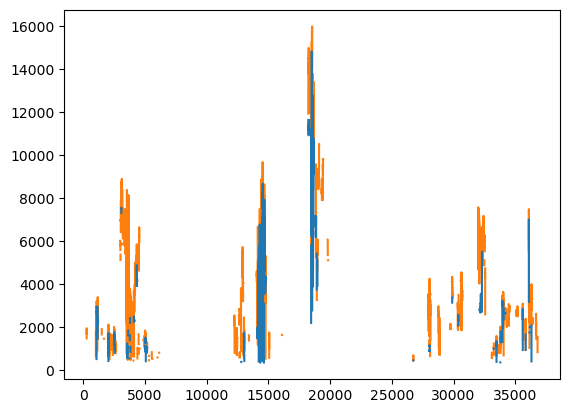

In [29]:
plt.plot(eth_10dbz)
plt.plot(eth_0dbz, zorder=0)

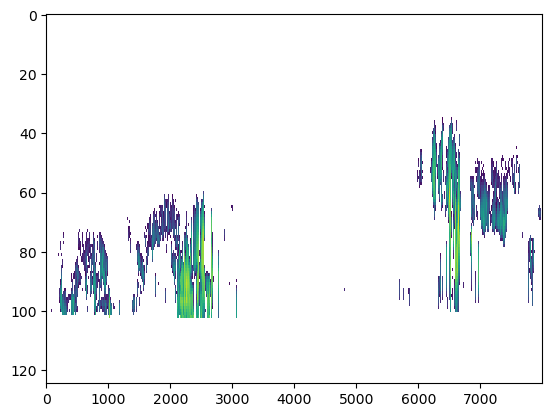

In [34]:
plt.imshow(
    geoprof_ds.Radar_Reflectivity.where(
        (geoprof_ds.Data_quality==0) & (geoprof_ds.CPR_Cloud_mask >= 30)
    )[12000:20000].T,
    aspect="auto", interpolation="nearest"
)

In [35]:
radar_ref = geoprof_ds.Radar_Reflectivity.where(
    (geoprof_ds.Data_quality==0) & (geoprof_ds.CPR_Cloud_mask >= 30)
)[12000:20000]

/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_88991/2211315831.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(


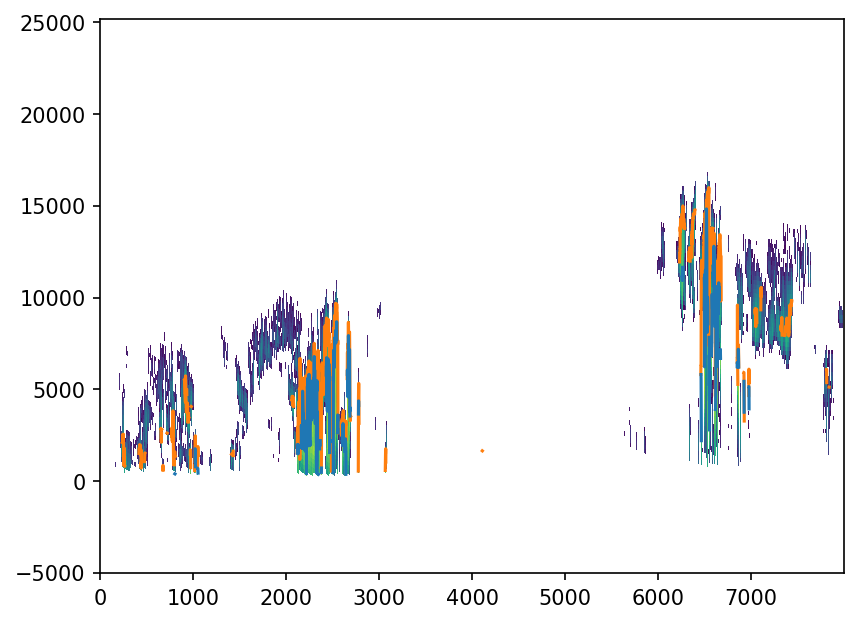

In [41]:
plt.figure(dpi=150)
plt.pcolormesh(
    radar_ref.Nray.values, 
    geoprof_ds.Height[12000:20000].values.T, 
    radar_ref.T
)
plt.plot(eth_10dbz[12000:20000], zorder=2.01)
plt.plot(eth_0dbz[12000:20000], zorder=2)

In [25]:
precip_column_ds = open_cloudsat(precip_column_file, variable=["Data_quality", "Precip_flag", "Status_flag", "Conv_strat_flag", "Diagnostic_precip_rate"])
                                                               

In [26]:
precip_column_ds

<xarray.Dataset> Size: 1MB
Dimensions:                 (Nray: 37081)
Coordinates:
    Profile_time            (Nray) datetime64[ns] 297kB 2010-07-14T11:23:21.1...
    UTC_start               float64 8B 4.1e+04
    TAI_start               float64 8B 5.533e+08
    Latitude                (Nray) float32 148kB -0.001594 -0.01126 ... 0.009657
    Longitude               (Nray) float32 148kB -144.6 -144.6 ... -169.3 -169.3
    DEM_elevation           (Nray) float32 148kB nan nan nan nan ... nan nan nan
Dimensions without coordinates: Nray
Data variables:
    Data_quality            (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Precip_flag             (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Status_flag             (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Conv_strat_flag         (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Diagnostic_precip_rate  (Nray) float32 148kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    granule_number:     22399.0
    ID_SITE:            Cooperative Institute for Research in the Atmosphere
    ID_CENTER:          CloudSat Data Processing Center
    ID_CENTER_URL:      http://cloudsat.cira.colostate.edu
    ID_MACHINE:         CSATLAS2
    ID_CREATED:         Mon Jan 29 20:29:11 2018
    algorithm_name:     2C-PRECIP-COLUMN
    algorithm_version:  P1_R05.0
    product_version:    P1_R05
    start_time:         20100714112321
    end_time:           20100714130213

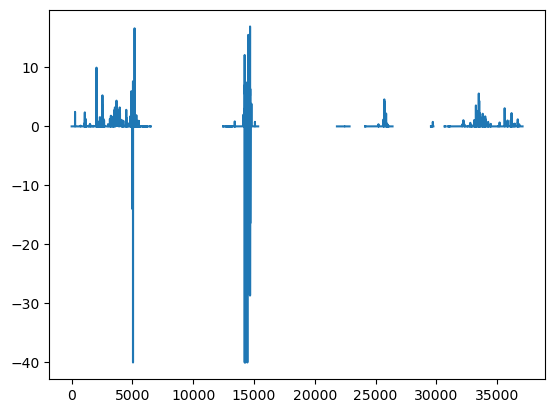

In [56]:
plt.plot(precip_column_ds.Diagnostic_precip_rate)

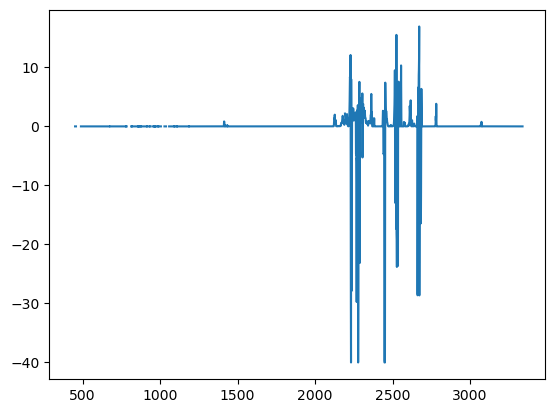

In [63]:
plt.plot(precip_column_ds.Diagnostic_precip_rate[12000:20000])

In [60]:
conv_column = precip_column_ds.Nray.where(
    (precip_column_ds.Conv_strat_flag == 1) & (precip_column_ds.Data_quality == 0)
)

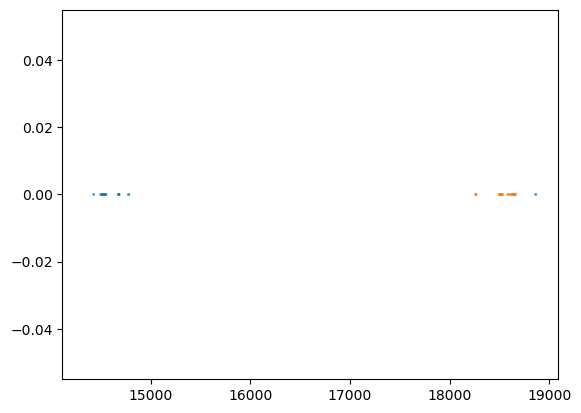

In [62]:
plt.plot(conv_column[12000:20000], np.zeros(conv_column.shape)[12000:20000])
plt.plot(eth_10dbz.Nray.where(eth_10dbz>1e4)[12000:20000], np.zeros(conv_column.shape)[12000:20000])